## Preprocessing

In [21]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [22]:
application_df.shape

(34299, 12)

In [23]:
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [24]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN'])
application_df.shape

(34299, 11)

In [25]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [26]:
# Look at APPLICATION_TYPE value counts for binning
bin1 = application_df['APPLICATION_TYPE'].value_counts()
bin1

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [27]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(bin1[bin1<1000].index)


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [28]:
# Look at CLASSIFICATION value counts for binning
bin2 = application_df['CLASSIFICATION'].value_counts()
bin2

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2570        1
C5200        1
C1283        1
C1370        1
C1728        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [29]:
# You may find it helpful to look at CLASSIFICATION value counts >1
bin2_1 = bin2[bin2>1]
print(bin2_1.shape)
print('=======================================================')
print(bin2_1)

(45,)
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1278       10
C1238       10
C1237        9
C1235        9
C7210        7
C1720        6
C4100        6
C2400        6
C1257        5
C1600        5
C2710        3
C0           3
C1260        3
C1256        2
C1267        2
C1246        2
C3200        2
C1234        2
Name: CLASSIFICATION, dtype: int64


In [30]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(bin2[bin2<10].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Other       98
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1278       10
C1238       10
Name: CLASSIFICATION, dtype: int64

In [31]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df,dtype=float)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values

# Drop the "Is Successful" column from X
X = application_df.drop('IS_SUCCESSFUL', axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [33]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [34]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=30
hidden_nodes_layer2=30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                588990    
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 589,951
Trainable params: 589,951
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("checkpointsV2/", exist_ok=True)
checkpoint_path = "checkpointsV2/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(filepath=checkpoint_path, save_weights_only = True, period = 5)


In [37]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
25724/25724 [==============================] - 7s 279us/sample - loss: 0.5026 - acc: 0.7498s
Epoch 2/100
25724/25724 [==============================] - 6s 246us/sample - loss: 0.1893 - acc: 0.9255s - loss: 0.2802 - ETA: 0s - loss: 0.1929 - acc: 0.92 - ETA: 0s - loss: 0.192
Epoch 3/100
25724/25724 [==============================] - 6s 252us/sample - loss: 0.1008 - acc: 0.96011s 
Epoch 4/100
25724/25724 [==============================] - 7s 264us/sample - loss: 0.0938 - acc: 0.9615s -
Epoch 5/100
25724/25724 [==============================] - 6s 245us/sample - loss: 0.0918 - acc: 0.9619s - loss: - ETA: 4s - loss: 0.0924 - ac - ETA: 3s - loss: 0.0905  - ETA: 3s - loss: 0.0907 - ETA: 2s -  - ETA: 0s - loss: 0.
Epoch 6/100
25724/25724 [==============================] - 6s 242us/sample - loss: 0.0904 - acc: 0.9623 ETA: 0s - loss: 0.0905 - acc:  - ETA: 0s - loss: 0.0902 - acc: 0.962
Epoch 7/100
25724/25724 [==============================] - 7s 257us/sample - loss: 0.0896 - acc: 0.

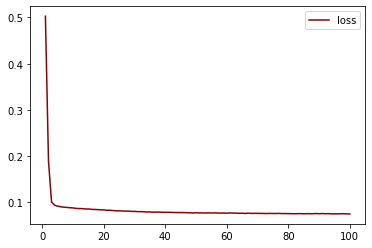

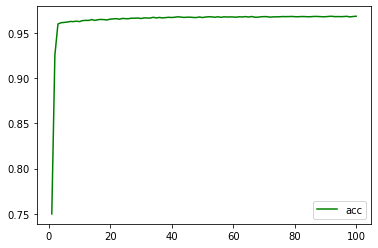

In [38]:
# Create a DataFrame containing training history
train_results_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
train_results_df.index += 1

# Plot the loss
V2_loss = train_results_df.plot(y="loss", color='darkred')
plt.savefig('Plots/V2_loss.png')

V2_Acc = train_results_df.plot(y="acc", color='green')
plt.savefig('Plots/V2_acc.png')

In [39]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 2s - loss: 0.7256 - acc: 0.6195
Loss: 0.7255525695408747, Accuracy: 0.619475245475769


In [40]:
# # Export our model to HDF5 file
nn.save('Output/Model_V2.h5')